# Decision Tree Classifier

Forming a decision tree for predicting QueryType from Sector, Crop, Category, Location, Hour of the Day attributes

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


## Reading the dataset into pandas dataframe

In [2]:
data = pd.read_csv('../Data/raw_data.csv',error_bad_lines=False)
data = data[data.columns[0:9]]

In [3]:
data

,Season,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,0,HORTICULTURE,Fruits,Mango,Nutrient Management,RAJASTHAN,KOTA,SANGOD,2018-12-31T20:54:08.55
1,0,AGRICULTURE,0,0,Weather,RAJASTHAN,KOTA,SANGOD,2018-12-31T20:48:22.753
2,0,AGRICULTURE,Others,Others,Weather,UTTARAKHAND,HARIDWAR,BAHADRABAD,2018-12-31T20:02:26.907
3,0,AGRICULTURE,Cereals,Paddy (Dhan),\tPlant Protection\t,WEST BENGAL,HOOGHLY,ARAMBAGH,2018-12-31T19:54:59.98
4,0,AGRICULTURE,Others,Others,Weather,RAJASTHAN,KOTA,SULTANPUR,2018-12-31T19:26:24.73
...,...,...,...,...,...,...,...,...,...
53924,NaN,HORTICULTURE,Vegetables,Bitter Gourd,Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-31T11:12:04.123
53925,KHARIF,AGRICULTURE,Others,Others,Weather,UTTAR PRADESH,KAUSHAMBI,NEVADA,2018-08-31T11:24:04.767
53926,KHARIF,AGRICULTURE,Others,Others,Government Schemes,UTTAR PRADESH,KAUSHAMBI,NEVADA,2018-08-31T11:31:08.857
53927,KHARIF,HORTICULTURE,Vegetables,Bitter Gourd,Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-31T17:04:26.923


converting the data['CreatedOn'] string objects into datetime objects

In [4]:
data['CreatedOn']=pd.to_datetime(data['CreatedOn'])

### Specifying the reference start time for hour count

In [5]:
init_time= "2018-01-01 00:00:00"
init_time =pd.to_datetime(init_time)

In [6]:
dateafter=pd.Series(int)


### Calculating the hour count from the reference start time and finding mod 24 inorder to find at which hour of the day the query has been recorded

In [7]:
for i in range(0,len(data)):
    tm=data.iloc[i]['CreatedOn']
    time_diff = time.mktime(tm.timetuple()) - time.mktime(init_time.timetuple())
    dateafter.at[i]=(int)(time_diff/(60*60))%24

In [8]:
print(dateafter)

0        20
1        20
2        20
3        19
4        19
         ..
53924    11
53925    11
53926    11
53927    17
53928    19
Length: 53929, dtype: object


### Now copying the obtained data into a new column 

In [9]:
data['Hour of the day']=dateafter

In [10]:
datebefore=pd.Series

In [11]:
datebefore=data['CreatedOn']

### Extracting the month number from the data['CreatedOn'] column objects

In [12]:
for i in range(0,len(data)):
    tm=data.iloc[i]['CreatedOn']
    dateafter.at[i]=tm.month

In [13]:
data['Month']=dateafter

### Now creating a new csv with the modified data.

In [14]:
data=data.drop(columns='Season')

In [15]:
for column in data[['Sector', 'Category', 'Crop', 'QueryType', 'StateName','CreatedOn' ]]:
    cnt=0
    for row in data[column]:
        try:
            int(row)
            data.loc[cnt, column]=np.nan
        except TypeError:
            pass
        except ValueError:
            pass
        cnt+=1

### Finding the number of null values

In [16]:
print (data.isnull().sum())

Sector              731
Category            977
Crop               1326
QueryType          7392
StateName             0
DistrictName          0
BlockName             0
CreatedOn             0
Hour of the day       0
Month                 0
dtype: int64


In [17]:
data=data.dropna()

In [18]:
data.reindex()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn,Hour of the day,Month
0,HORTICULTURE,Fruits,Mango,Nutrient Management,RAJASTHAN,KOTA,SANGOD,2018-12-31 20:54:08.550,20,12
2,AGRICULTURE,Others,Others,Weather,UTTARAKHAND,HARIDWAR,BAHADRABAD,2018-12-31 20:02:26.907,20,12
3,AGRICULTURE,Cereals,Paddy (Dhan),\tPlant Protection\t,WEST BENGAL,HOOGHLY,ARAMBAGH,2018-12-31 19:54:59.980,19,12
4,AGRICULTURE,Others,Others,Weather,RAJASTHAN,KOTA,SULTANPUR,2018-12-31 19:26:24.730,19,12
5,AGRICULTURE,Others,Others,Weather,CHHATTISGARH,RAIPUR,ARANG,2018-12-31 19:01:28.133,19,12
...,...,...,...,...,...,...,...,...,...,...
53924,HORTICULTURE,Vegetables,Bitter Gourd,Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-31 11:12:04.123,11,8
53925,AGRICULTURE,Others,Others,Weather,UTTAR PRADESH,KAUSHAMBI,NEVADA,2018-08-31 11:24:04.767,11,8
53926,AGRICULTURE,Others,Others,Government Schemes,UTTAR PRADESH,KAUSHAMBI,NEVADA,2018-08-31 11:31:08.857,11,8
53927,HORTICULTURE,Vegetables,Bitter Gourd,Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-31 17:04:26.923,17,8


In [19]:
data=data.reset_index()

In [20]:
data=data.drop(columns='index')

In [21]:
indexNames = data[ (data['Sector'] == 'Others') | (data['Category'] == 'Others') | (data['Crop'] == 'Others') | (data['QueryType'] == 'Others') ].index
 
data.drop(indexNames , inplace=True)

In [22]:
data = data.replace({'\tPlant Protection\t':'Plant Protection',
                     '\tField Preparation\t':'Field Preparation',
                     '\tWater Management\t':'Water Management'})

In [23]:
data=data.reset_index()
data=data.drop(columns=['index'])
data

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn,Hour of the day,Month
0,HORTICULTURE,Fruits,Mango,Nutrient Management,RAJASTHAN,KOTA,SANGOD,2018-12-31 20:54:08.550,20,12
1,AGRICULTURE,Cereals,Paddy (Dhan),Plant Protection,WEST BENGAL,HOOGHLY,ARAMBAGH,2018-12-31 19:54:59.980,19,12
2,HORTICULTURE,Vegetables,Cucumber,Plant Protection,WEST BENGAL,HOOGHLY,DHANIAKHALI,2018-12-31 18:48:45.187,18,12
3,AGRICULTURE,Cereals,Wheat,Cultural Practices,UTTAR PRADESH,KAUSHAMBI,KAUSHAMBI,2018-12-31 18:01:32.473,18,12
4,AGRICULTURE,Cereals,Wheat,Fertilizer Use and Availability,GUJARAT,Mehsana,SATLASNA,2018-12-31 18:00:23.393,18,12
...,...,...,...,...,...,...,...,...,...,...
23201,HORTICULTURE,Vegetables,Pumpkin,Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-30 09:31:36.877,9,8
23202,AGRICULTURE,Cereals,Paddy (Dhan),Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-30 15:56:22.217,15,8
23203,AGRICULTURE,Cereals,Paddy (Dhan),Weather,UTTAR PRADESH,KAUSHAMBI,CHAIL,2018-08-30 19:42:38.267,19,8
23204,HORTICULTURE,Vegetables,Bitter Gourd,Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-31 11:12:04.123,11,8


In [24]:
data['Sector'].value_counts()

AGRICULTURE         13448
HORTICULTURE         9345
ANIMAL HUSBANDRY      373
FISHERIES              40
Name: Sector, dtype: int64

In [25]:
data['Category'].value_counts()

Cereals                          7716
Vegetables                       6144
Fruits                           1728
Oilseeds                         1410
Fiber Crops                      1399
Pulses                           1372
Condiments and Spices            1043
Millets                           904
Sugar and Starch Crops            497
Animal                            356
Flowers                           129
Medicinal and Aromatic Plants     129
Fodder Crops                      122
Plantation Crops                   97
Drug and Narcotics                 75
Inland                             34
Avian                              17
Beekeeping                         17
Green Manure                       11
Marine                              6
Name: Category, dtype: int64

In [26]:
data['Crop'].value_counts()

Paddy (Dhan)                    5344
Wheat                           2209
Cotton (Kapas)                  1284
Chillies                        1114
Brinjal                          744
                                ... 
Kokum                              1
Kolanchi(Tephrosia Purpurea)       1
Brackish                           1
Chinese Cabbage                    1
Winged Bean                        1
Name: Crop, Length: 239, dtype: int64

In [27]:
data

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn,Hour of the day,Month
0,HORTICULTURE,Fruits,Mango,Nutrient Management,RAJASTHAN,KOTA,SANGOD,2018-12-31 20:54:08.550,20,12
1,AGRICULTURE,Cereals,Paddy (Dhan),Plant Protection,WEST BENGAL,HOOGHLY,ARAMBAGH,2018-12-31 19:54:59.980,19,12
2,HORTICULTURE,Vegetables,Cucumber,Plant Protection,WEST BENGAL,HOOGHLY,DHANIAKHALI,2018-12-31 18:48:45.187,18,12
3,AGRICULTURE,Cereals,Wheat,Cultural Practices,UTTAR PRADESH,KAUSHAMBI,KAUSHAMBI,2018-12-31 18:01:32.473,18,12
4,AGRICULTURE,Cereals,Wheat,Fertilizer Use and Availability,GUJARAT,Mehsana,SATLASNA,2018-12-31 18:00:23.393,18,12
...,...,...,...,...,...,...,...,...,...,...
23201,HORTICULTURE,Vegetables,Pumpkin,Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-30 09:31:36.877,9,8
23202,AGRICULTURE,Cereals,Paddy (Dhan),Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-30 15:56:22.217,15,8
23203,AGRICULTURE,Cereals,Paddy (Dhan),Weather,UTTAR PRADESH,KAUSHAMBI,CHAIL,2018-08-30 19:42:38.267,19,8
23204,HORTICULTURE,Vegetables,Bitter Gourd,Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-31 11:12:04.123,11,8


In [28]:
#one-hot encoding attributes used for prediction model
feature_cols = ['Sector','Category', 'Crop', 'StateName','DistrictName','BlockName','Month']
X = data[feature_cols]
len(X.columns)

df_onehot = pd.get_dummies(X)
df_onehot

,Month,Sector_AGRICULTURE,Sector_ANIMAL HUSBANDRY,Sector_FISHERIES,Sector_HORTICULTURE,Category_Animal,Category_Avian,Category_Beekeeping,Category_Cereals,Category_Condiments and Spices,...,BlockName_WAZIRGANJ,BlockName_WYRA,BlockName_YADAGIRIGUTTA,BlockName_YEDAPALLE,BlockName_YELDURTHY,BlockName_YELLANDU,BlockName_YELLAREDDIPET,BlockName_YERRUPALEM,BlockName_ZAFFERGADH,BlockName_ZAHIRABAD
0,12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23201,8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23202,8,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23203,8,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23204,8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#label encoding of Target attribute
labels = data['QueryType'].astype('category').cat.categories.tolist()
replace_map_comp = {'QueryType' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
replace_map_comp
data_replace = data.replace(replace_map_comp)
replace_map_comp

{'QueryType': {'Agriculture Mechanization': 1,
  'Animal Breeding': 2,
  'Animal Nutrition': 3,
  'Animal Production (Piggery, Goatery, Sheep Farming etc.)': 4,
  'Artificial Insemination': 5,
  'Beekeeping': 6,
  'Bio-Pesticides and Bio-Fertilizers': 7,
  'Breeding and culture of ornamental fish': 8,
  'Breeding of freshwater prawn': 9,
  'Cattle shed Planning and Management': 10,
  'Coastal Aquaculture': 11,
  'Cold Storage': 12,
  'Credit': 13,
  'Crop Insurance': 14,
  'Cultural Practices': 15,
  'Dairy Production': 16,
  'Disease Management': 17,
  'Disease Reporting': 18,
  'Fertilizer Use and Availability': 19,
  'Field Preparation': 20,
  'Fish  Marketing': 21,
  'Fish Dressing   Drying': 22,
  'Fish Fingerling Production': 23,
  'Fishery Mechanization': 24,
  'Fishery Nutrition': 25,
  'Fishing Harbours and Landing Centre': 26,
  'Floriculture': 27,
  'Freshwater Pearl Farming.': 28,
  'Freshwater pearl culture': 29,
  'Government Schemes': 30,
  'Integrated Farming': 31,
  'L

In [30]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [31]:
X = df_onehot #feature variables
y = data_replace.QueryType # Target variable

In [32]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train

,Month,Sector_AGRICULTURE,Sector_ANIMAL HUSBANDRY,Sector_FISHERIES,Sector_HORTICULTURE,Category_Animal,Category_Avian,Category_Beekeeping,Category_Cereals,Category_Condiments and Spices,...,BlockName_WAZIRGANJ,BlockName_WYRA,BlockName_YADAGIRIGUTTA,BlockName_YEDAPALLE,BlockName_YELDURTHY,BlockName_YELLANDU,BlockName_YELLAREDDIPET,BlockName_YERRUPALEM,BlockName_ZAFFERGADH,BlockName_ZAHIRABAD
6632,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11562,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12272,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8233,7,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7067,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17289,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12172,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<module 'matplotlib.pyplot' from 'C:\\Users\\A Busy Jet\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

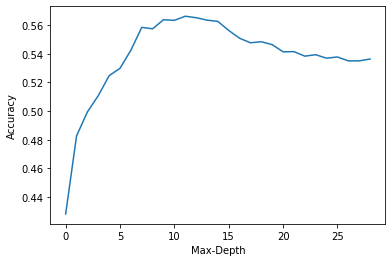

In [33]:
#Finding optimal max_depth of prediction tree avoiding over-fitting or under-fitting
depth=1
acc=[]
while(depth<30):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    depth=depth+1
plt.ylabel('Accuracy')
plt.xlabel('Max-Depth')
plt.plot(acc)
plt.savefig('./../Plots/optimalDepth.png')
plt

In [34]:
#Decisioin tree with optimal depth
depth = acc.index(max(acc))
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=14)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
y_pred

array([35, 15, 41, ..., 41, 59, 41], dtype=int64)

In [ ]:
#Accuracy of prediction model predicting QueryType
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## The below code has been run to create decision tree image (can be found in plots sub folder) , it requires graphviz binaries to be installed apart from python module

In [40]:
#pictorial representation of the Decision tree Classifier
#Requires graphviz binaries installed apart from python module
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True, feature_names = df_onehot.columns,class_names=str(list(range(1, 61))))
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('./../Plots/queryDecision.png')
#Image(graph.create_png())